<a href="https://colab.research.google.com/github/hiauls/ShoesImageClassification/blob/main/Shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***IMAGE CLASSIFICATION ON ADIDAS AND NIKE SHOES***

***Title*** : Image Classification for Adidas and Nike Shoes uses a Convolutional Neural Network

***Member Name*** :

1.   Iqmah Nurrizky A
2.   Aulia Lintang A

***Dataset*** : Nike, Adidas Shoes for Image Classification Dataset

***Dataset Link*** : [Nike, Adidas Shoes for Image Classification Dataset](https://www.kaggle.com/datasets/ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset?datasetId=2361804&sortBy=voteCount)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification'

/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification'

In [ ]:
!kaggle datasets download -d ifeanyinneji/nike-adidas-shoes-for-image-classification-dataset

 66% 17.0M/25.7M [00:00<00:00, 44.2MB/s]
100% 25.7M/25.7M [00:00<00:00, 55.6MB/s]


In [ ]:
!unzip '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/nike-adidas-shoes-for-image-classification-dataset.zip'

Archive:  /content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/nike-adidas-shoes-for-image-classification-dataset.zip
  inflating: labelnames.csv          
  inflating: test/adidas/Adidas (18).jpg  
  inflating: test/adidas/Adidas (19).jpg  
  inflating: test/adidas/Adidas (20).jpg  
  inflating: test/adidas/Adidas (21).JPG  
  inflating: test/adidas/Adidas (22).jpg  
  inflating: test/adidas/Adidas (23).jpg  
  inflating: test/adidas/Adidas (24).jpg  
  inflating: test/adidas/Adidas (25).jpg  
  inflating: test/adidas/Adidas (26).jpg  
  inflating: test/adidas/Adidas (27).jpg  
  inflating: test/adidas/aadidas_ (10).jpg  
  inflating: test/adidas/aadidas_ (11).jpg  
  inflating: test/adidas/aadidas_ (12).jpg  
  inflating: test/adidas/aadidas_ (13).jpg  
  inflating: test/adidas/aadidas_ (14).jpg  
  inflating: test/adidas/aadidas_ (15).jpg  
  inflating: test/adidas/aadidas_ (16).jpg  
  inflating: test/adidas/aadidas_ (17).jpg  
  inflating: test/adidas/aadidas_ (18).jpg  
 

In [3]:
!pip install split-folders

#***LOAD DATASET***

In [4]:
import os
import cv2
import shutil
import zipfile
import numpy as np
import pandas as pd
import splitfolders
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from keras.datasets import mnist
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D, Flatten


In [5]:
base_dataset = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/test'
class_dir = ['adidas', 'nike']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
      os.remove(os.path.join(cur_dir, item))

In [ ]:
!mkdir '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes'
!mkdir '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/adidas'
!mkdir '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/nike'
!mkdir '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split'

mkdir: cannot create directory ‘/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/adidas’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/nike’: File exists
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split’: File exists


In [ ]:
adidas_images = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/adidas'
nike_images = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes/nike'

test_adidas_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/test/adidas'
train_adidas_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/train/adidas'
val_adidas_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/validation/adidas'

test_nike_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/test/nike'
train_nike_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/train/nike'
val_nike_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/validation/nike'

In [ ]:
temp_test_adidas = os.listdir(test_adidas_dir)
temp_train_adidas = os.listdir(train_adidas_dir)
temp_val_adidas = os.listdir(val_adidas_dir)

for file in temp_test_adidas:
  new_path = shutil.move(f"{test_adidas_dir}/{file}", adidas_images)

for file in temp_train_adidas:
  new_path = shutil.move(f"{train_adidas_dir}/{file}", adidas_images)

for file in temp_val_adidas:
  new_path = shutil.move(f"{val_adidas_dir}/{file}", adidas_images)

In [ ]:
temp_test_nike = os.listdir(test_nike_dir)
temp_train_nike = os.listdir(train_nike_dir)
temp_val_nike = os.listdir(val_nike_dir)

for file in temp_test_nike:
  new_path = shutil.move(f"{test_nike_dir}/{file}", nike_images)

for file in temp_train_nike:
  new_path = shutil.move(f"{train_nike_dir}/{file}", nike_images)

for file in temp_val_nike:
  new_path = shutil.move(f"{val_nike_dir}/{file}", nike_images)

In [ ]:
print("Total Image Adidas", len(os.listdir(adidas_images)))
print("Total Image Nike", len(os.listdir(nike_images)))

Total Image Adidas 286
Total Image Nike 288


In [ ]:
data_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/shoes'
output = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split'

splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(0.7, 0.3))

Copying files: 574 files [03:49,  2.50 files/s]


In [6]:
train_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/train'
val_dir = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/val'

In [8]:
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [7]:
valX = []
valY = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [9]:
print("Train Data=", trainX.shape)
print("Train Label=", trainY.shape)
print("Validation Data=", valX.shape)
print("Validation Label=", valY.shape)

Train Data= (387, 150, 150, 3)
Train Label= (387,)
Validation Data= (165, 150, 150, 3)
Validation Label= (165,)


In [10]:
train_adidas = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/train/adidas'
val_adidas = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/val/adidas'
train_nike = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/train/nike'
val_nike = '/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/val/nike'

print('total adidas train data:', len(os.listdir(train_adidas)))
print('total adidas valdation data:', len(os.listdir(val_adidas)))
print('total nike train data:', len(os.listdir(train_nike)))
print('total nike valdation data:', len(os.listdir(val_nike)))

total adidas train data: 200
total adidas valdation data: 86
total nike train data: 201
total nike valdation data: 87


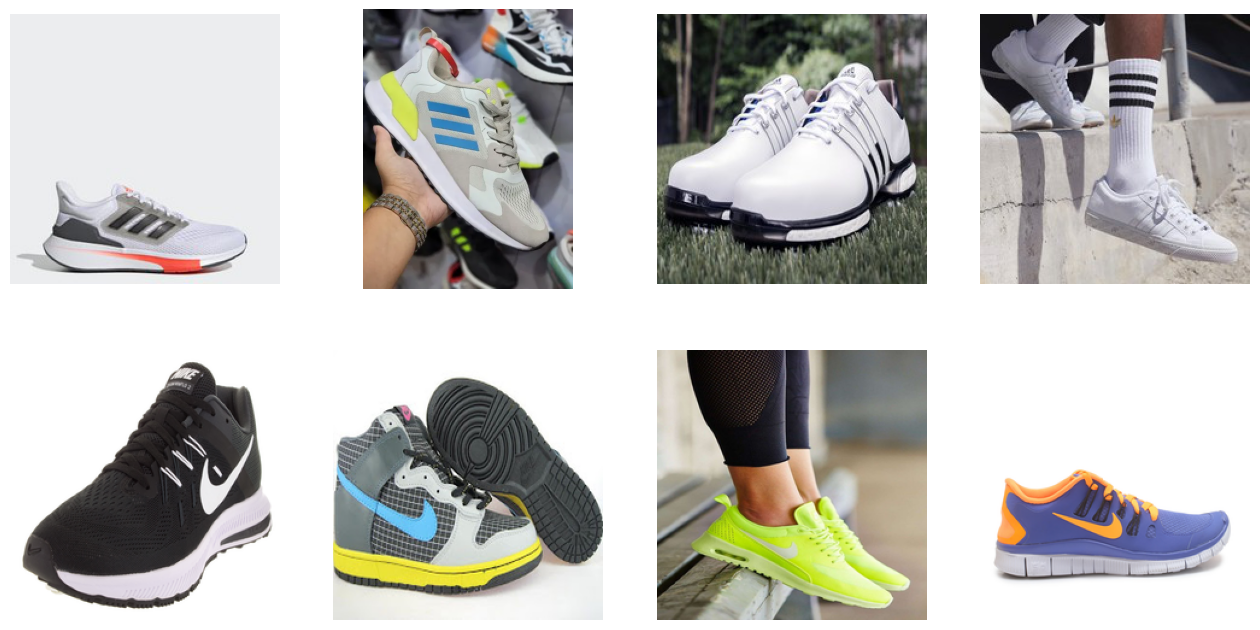

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
adidas_pix = [os.path.join(train_adidas, fname)
                for fname in os.listdir(train_adidas)[pic_index-4:pic_index]]
nike_pix = [os.path.join(train_nike, fname)
                for fname in os.listdir(train_nike)[pic_index-4:pic_index]]

for i, img_path in enumerate(adidas_pix+nike_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
lb = LabelEncoder()
trainY = lb.fit_transform(trainY)
valY = lb.fit_transform(valY)

print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))

Train min=0, max=255
Validation min=0, max=255


In [13]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow(trainX, trainY, batch_size=64)
val_iterator = datagen.flow(valX, valY, batch_size=64)
print('Batches train=%d, validation=%d' % (len(train_iterator), len(val_iterator)))

batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batches train=7, validation=3
Batch shape=(64, 150, 150, 3), min=0.000, max=1.000


#***DATA AUGMENTASI***

Found 401 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


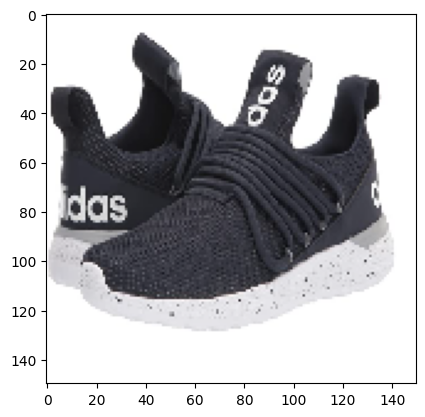

In [14]:
train_generator = ImageDataGenerator(rescale = 1/255)
train_data = train_generator.flow_from_directory('/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/train',
                                                 target_size = (150, 150),
                                                 batch_size = 64,
                                                 shuffle = True,
                                                 class_mode = 'binary',
                                                 color_mode = 'rgb')
for _ in range(5):
      img, label = train_data.next()
      plt.imshow(img[0])
      plt.show

Found 173 images belonging to 2 classes.


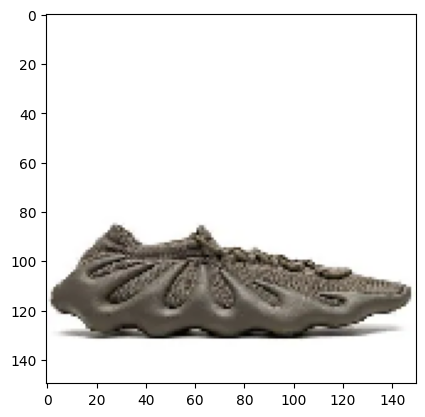

In [15]:
val_generator = ImageDataGenerator(rescale = 1/255)

val_data = val_generator.flow_from_directory('/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/split/val',
                                             target_size = (150, 150),
                                             batch_size = 64,
                                             shuffle = True,
                                             class_mode = 'binary',
                                             color_mode = 'rgb')

for _ in range(5):
      img, label = val_data.next()
      plt.imshow(img[0])
      plt.show

#***MODELING***

In [16]:
# build a simple model
model = Sequential()
model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(SpatialDropout2D(rate=0.5))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Flatten())

# fully connected
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 spatial_dropout2d (SpatialD  (None, 150, 150, 32)     0         
 ropout2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                        

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
H = model.fit(train_iterator, epochs=100, validation_data=val_iterator)

Epoch 1/100
7/7 [==============================] - 21s 3s/step - loss: 0.6865 - accuracy: 0.5711 - val_loss: 0.6912 - val_accuracy: 0.5515
Epoch 2/100
7/7 [==============================] - 20s 3s/step - loss: 0.6681 - accuracy: 0.5891 - val_loss: 0.6885 - val_accuracy: 0.5333
Epoch 3/100
7/7 [==============================] - 18s 3s/step - loss: 0.6798 - accuracy: 0.5504 - val_loss: 0.6970 - val_accuracy: 0.5394
Epoch 4/100
7/7 [==============================] - 22s 4s/step - loss: 0.6993 - accuracy: 0.5297 - val_loss: 0.6915 - val_accuracy: 0.5333
Epoch 5/100
7/7 [==============================] - 20s 3s/step - loss: 0.6909 - accuracy: 0.5271 - val_loss: 0.6873 - val_accuracy: 0.5394
Epoch 6/100
7/7 [==============================] - 18s 3s/step - loss: 0.7028 - accuracy: 0.5530 - val_loss: 0.6874 - val_accuracy: 0.5394
Epoch 7/100
7/7 [==============================] - 18s 3s/step - loss: 0.7150 - accuracy: 0.5297 - val_loss: 0.6905 - val_accuracy: 0.5394
Epoch 8/100
7/7 [==========

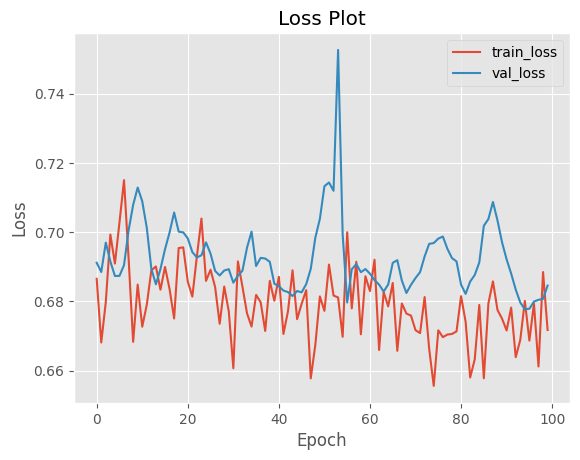

In [22]:
plt.style.use("ggplot")
plt.figure()
#plt.axis(0,15,0,8)
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [26]:
model.save('/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/model.h5')

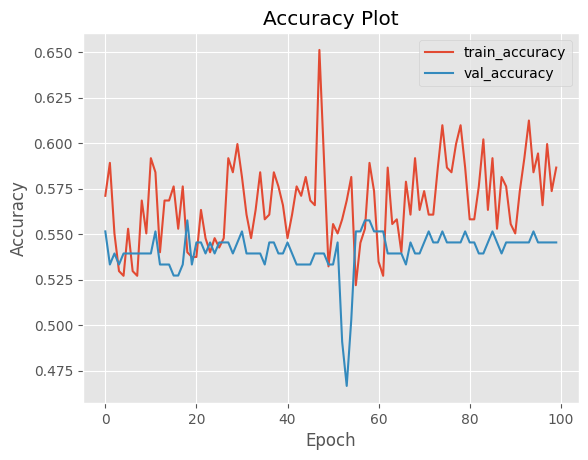

In [27]:
# plotting accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
model.save('/content/gdrive/MyDrive/Github/Shoes_for_ImageClassification/model1.h5')

In [36]:
# classification report
pred = model.predict(trainX)
labels = (pred > 1).astype(np.int)
print(classification_report(trainY, labels))

13/13 [==============================] - 6s 470ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       197
           1       0.00      0.00      0.00       190

    accuracy                           0.51       387
   macro avg       0.25      0.50      0.34       387
weighted avg       0.26      0.51      0.34       387



<ipython-input-36-31c70fc9191b>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (pred > 1).astype(np.int)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-sco